In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Index(['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng',
       'Shape_Area', 'EAN', 'geometry'],
      dtype='object')
EPSG:28992


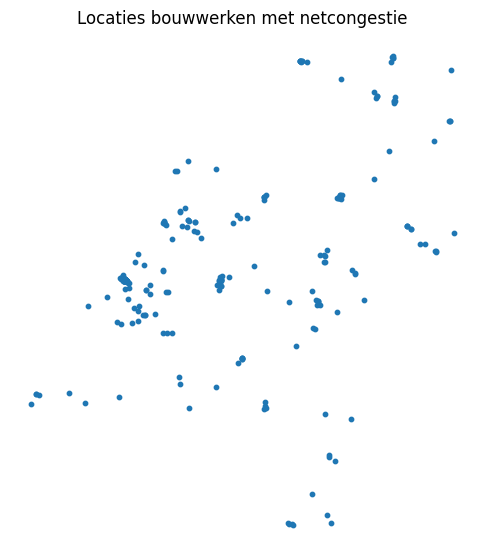

In [2]:

gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

display(gdf.head())       # first rows
print(gdf.columns)      # list of all attribute columns
print(gdf.crs)          # coordinate reference system


# Use centroids as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid

fig, ax = plt.subplots(figsize=(6, 8))
points.plot(ax=ax, markersize=10)  # big dots so you can see them
ax.set_title("Locaties bouwwerken met netcongestie")
ax.set_axis_off()
plt.show()

Bouwwerken shapefile:


,OBJECTID,UVID,BOUWWERKCO,AFSTOOTSTA,Shape_Leng,Shape_Area,EAN,geometry
0,2,8NF-W7M-MMJG-HQ1,6221AC125_01,nietinafstoting,272.393826,2917.962565,EAN_871690421364903296,"POLYGON Z ((177229.538 317262.078 0, 177256.05..."
1,3,H3P-SBD-MNG1-EEY,3313K25_01,nietinafstoting,885.742739,7680.699429,EAN_871689276000063698,"POLYGON Z ((108347.993 425810.848 0, 108356.65..."
2,4,T10-8K4-S2KB-5F3,7334LVW490_02,nietinafstoting,244.542108,1363.906093,EAN_871687110001854256,"POLYGON Z ((194192.907 465709.195 0, 194258.20..."
3,5,12T-GT1-86ZY-68R,2515R50_01,nietinafstoting,329.932221,2322.523005,EAN_871689200000013384,"POLYGON Z ((82000.798 455304.865 0, 82000.646 ..."
4,6,EAP-AJC-PVF1-3AP,2511T147_01,nietinafstoting,364.144225,5020.276578,EAN_871689200008171789,"POLYGON Z ((82030.926 455069.13 0, 82004.844 4..."


Columns: ['OBJECTID', 'UVID', 'BOUWWERKCO', 'AFSTOOTSTA', 'Shape_Leng', 'Shape_Area', 'EAN', 'geometry']
CRS (gdf): EPSG:28992

Netherlands 1km shapefile (first rows):


,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3793N3217,3793000,3217000,"POLYGON ((3793000 3217000, 3793000 3218000, 37..."
1,1kmE3793N3218,3793000,3218000,"POLYGON ((3793000 3218000, 3793000 3219000, 37..."
2,1kmE3793N3219,3793000,3219000,"POLYGON ((3793000 3219000, 3793000 3220000, 37..."
3,1kmE3793N3220,3793000,3220000,"POLYGON ((3793000 3220000, 3793000 3221000, 37..."
4,1kmE3793N3221,3793000,3221000,"POLYGON ((3793000 3221000, 3793000 3222000, 37..."


Columns: ['CELLCODE', 'EOFORIGIN', 'NOFORIGIN', 'geometry']
CRS (nl): EPSG:3035


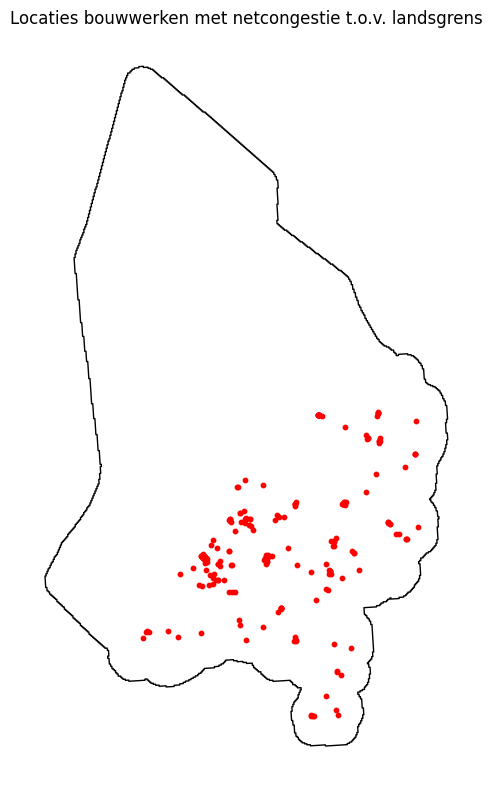

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display

# Read  buildings shapefile
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

print("Bouwwerken shapefile:")
display(gdf.head())       # first rows
print("Columns:", gdf.columns.tolist())
print("CRS (gdf):", gdf.crs)

# Read the Netherlands 1 km shapefile

nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")

print("\nNetherlands 1km shapefile (first rows):")
display(nl.head())
print("Columns:", nl.columns.tolist())
print("CRS (nl):", nl.crs)

#  Make sure NL is in the same CRS as the buildings
if nl.crs is None:
    nl = nl.set_crs(gdf.crs)
elif nl.crs != gdf.crs:
    nl = nl.to_crs(gdf.crs)

#  Create only the outer border of the Netherlands

nl_dissolved = nl.dissolve()          # single (multi)polygon
nl_border = nl_dissolved.boundary     # just the outline

# .  centroids of  building polygons as points
points = gdf.copy()
points["geometry"] = points.geometry.centroid



fig, ax = plt.subplots(figsize=(6, 8))

# Plot ONLY the Netherlands outer border
nl_border.plot(ax=ax, edgecolor="black", linewidth=1)

# Plot your buildings as red dots on top
points.plot(ax=ax, markersize=10, color="red")

ax.set_aspect("equal")  # keep correct proportions
ax.set_title("Locaties bouwwerken met netcongestie t.o.v. landsgrens")
ax.set_axis_off()

plt.tight_layout()
plt.show()


C:\Users\tobia\AppData\Local\Temp\ipykernel_42688\1814822559.py:245: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.93])


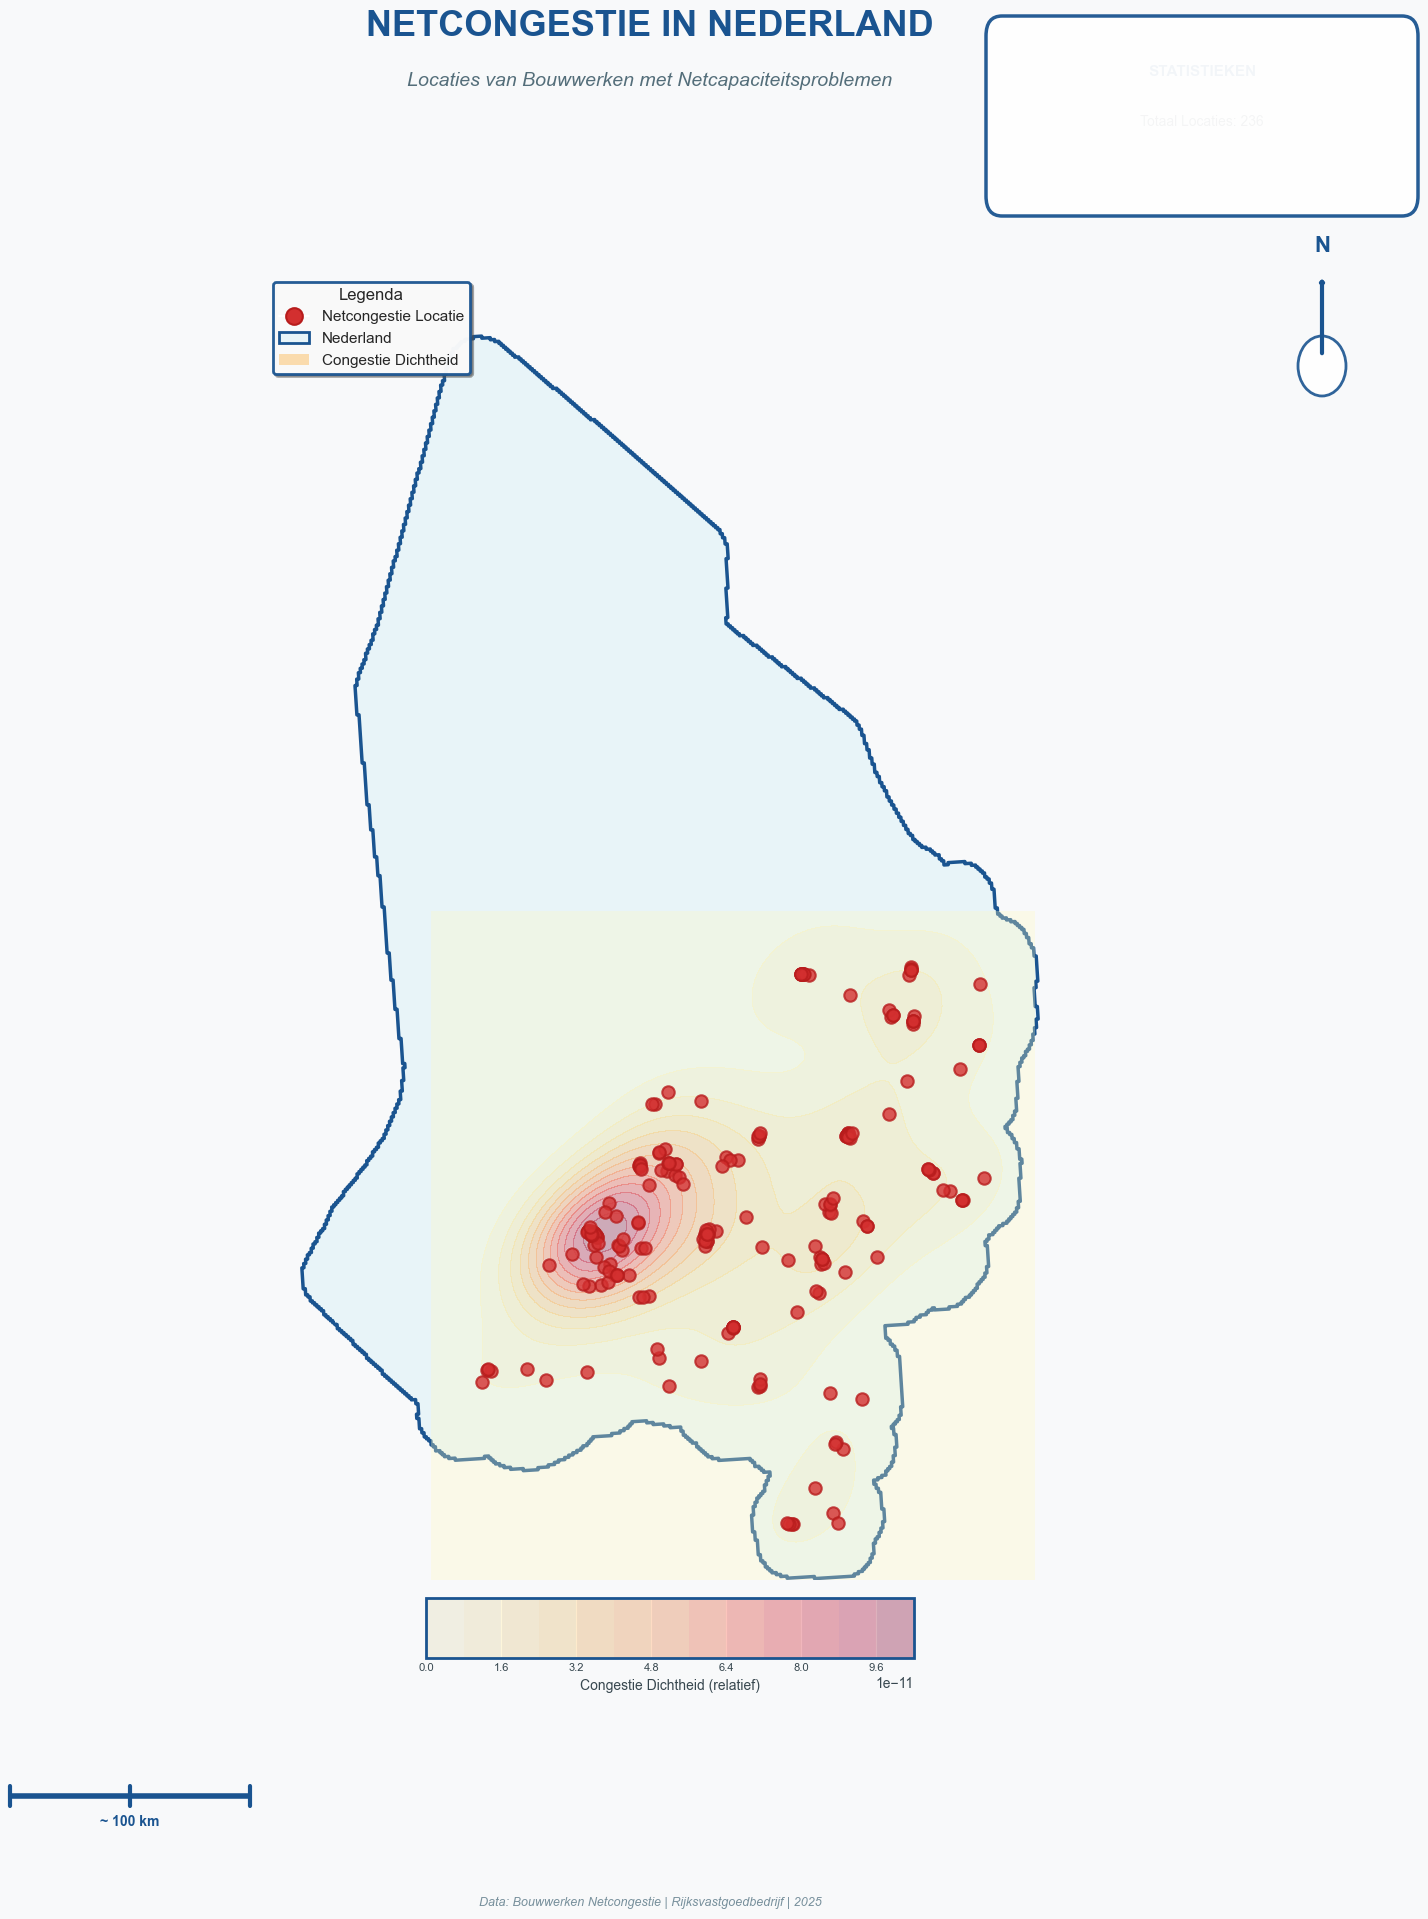


NETCONGESTIE VISUALISATIE - NEDERLAND
Totaal aantal geïdentificeerde locaties: 236
Data bestand: Bouwwerken_netcongestie.shp


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch
from matplotlib.lines import Line2D
import numpy as np
from scipy.stats import gaussian_kde

# Set style for professional appearance
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Read the data
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")
nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")

# Ensure same CRS
if nl.crs is None:
    nl = nl.set_crs(gdf.crs)
elif nl.crs != gdf.crs:
    nl = nl.to_crs(gdf.crs)

# Create Netherlands outline
nl_dissolved = nl.dissolve()

# Convert building polygons to centroids
points = gdf.copy()
points["geometry"] = points.geometry.centroid

# Create figure with subplots
fig = plt.figure(figsize=(16, 20), facecolor='#f8f9fa')
gs = fig.add_gridspec(20, 20, hspace=0.3, wspace=0.3)

# Main map
ax_main = fig.add_subplot(gs[1:18, 1:19])

# ============ MAIN MAP VISUALIZATION ============

# Create a gradient background effect
nl_dissolved.plot(ax=ax_main, 
                  facecolor='#e8f4f8',
                  edgecolor='none',
                  alpha=1.0,
                  zorder=1)

# Add subtle grid overlay for Netherlands
nl_dissolved.boundary.plot(ax=ax_main,
                          edgecolor='#1a5490',
                          linewidth=2.5,
                          zorder=2)

# Create density visualization using kernel density estimation
coords = np.array([[geom.x, geom.y] for geom in points.geometry])
if len(coords) > 1:
    kde = gaussian_kde(coords.T)
    
    # Create grid for density
    xmin, xmax = coords[:, 0].min(), coords[:, 0].max()
    ymin, ymax = coords[:, 1].min(), coords[:, 1].max()
    
    # Expand bounds slightly
    x_range = xmax - xmin
    y_range = ymax - ymin
    xmin -= x_range * 0.1
    xmax += x_range * 0.1
    ymin -= y_range * 0.1
    ymax += y_range * 0.1
    
    xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # Plot density as contour
    contour = ax_main.contourf(xi, yi, zi.reshape(xi.shape), 
                              levels=15,
                              cmap='YlOrRd',
                              alpha=0.3,
                              zorder=3)

# Plot the congestion points with enhanced styling
points.plot(ax=ax_main, 
           markersize=80, 
           color='#d32f2f',
           alpha=0.8,
           edgecolor='#b71c1c',
           linewidth=1.5,
           zorder=5)

# Add white glow effect around points
points.plot(ax=ax_main,
           markersize=100,
           color='white',
           alpha=0.3,
           edgecolor='none',
           zorder=4)

# ============ STYLING ============
ax_main.set_aspect('equal')
ax_main.set_axis_off()

# Add decorative border
for spine in ax_main.spines.values():
    spine.set_edgecolor('#1a5490')
    spine.set_linewidth(3)
    spine.set_visible(True)

# ============ TITLE AND HEADERS ============
title_text = 'NETCONGESTIE IN NEDERLAND'
subtitle_text = 'Locaties van Bouwwerken met Netcapaciteitsproblemen'

fig.text(0.5, 0.96, title_text, 
         fontsize=26, 
         fontweight='bold',
         ha='center',
         color='#1a5490',
         family='sans-serif')

fig.text(0.5, 0.935, subtitle_text,
         fontsize=14,
         ha='center',
         color='#546e7a',
         style='italic')

# ============ LEGEND ============
legend_elements = [
    Line2D([0], [0], marker='o', color='w', 
           markerfacecolor='#d32f2f', markersize=12, 
           markeredgecolor='#b71c1c', markeredgewidth=1.5,
           label='Netcongestie Locatie'),
    mpatches.Patch(facecolor='#e8f4f8', edgecolor='#1a5490', 
                   linewidth=2, label='Nederland'),
    mpatches.Patch(facecolor='#ff9800', alpha=0.3, 
                   edgecolor='none', label='Congestie Dichtheid')
]

legend = ax_main.legend(handles=legend_elements,
                       loc='upper left',
                       fontsize=11,
                       frameon=True,
                       fancybox=True,
                       shadow=True,
                       framealpha=0.95,
                       edgecolor='#1a5490',
                       title='Legenda',
                       title_fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_linewidth(2)

# ============ STATISTICS BOX ============
total_points = len(points)
stats_box = FancyBboxPatch((0.72, 0.88), 0.25, 0.08,
                          transform=fig.transFigure,
                          boxstyle="round,pad=0.01",
                          facecolor='white',
                          edgecolor='#1a5490',
                          linewidth=2.5,
                          alpha=0.95,
                          zorder=100)
fig.add_artist(stats_box)

fig.text(0.845, 0.94, 'STATISTIEKEN', 
         fontsize=11, 
         fontweight='bold',
         ha='center',
         color='#1a5490')

fig.text(0.845, 0.915, f'Totaal Locaties: {total_points}',
         fontsize=10,
         ha='center',
         color='#37474f')

# ============ NORTH ARROW ============
# Add north arrow
arrow_x, arrow_y = 0.92, 0.80
arrow = FancyArrowPatch((arrow_x, arrow_y), (arrow_x, arrow_y + 0.04),
                       transform=fig.transFigure,
                       arrowstyle='->,head_width=0.8,head_length=0.8',
                       color='#1a5490',
                       linewidth=3,
                       zorder=100)
fig.add_artist(arrow)

fig.text(arrow_x, arrow_y + 0.05, 'N',
         fontsize=16,
         fontweight='bold',
         ha='center',
         va='bottom',
         color='#1a5490',
         transform=fig.transFigure)

# Add compass circle
compass_circle = Circle((arrow_x, arrow_y - 0.005), 0.015,
                       transform=fig.transFigure,
                       facecolor='white',
                       edgecolor='#1a5490',
                       linewidth=2,
                       alpha=0.9,
                       zorder=99)
fig.add_artist(compass_circle)

# ============ SCALE BAR ============
# Approximate scale bar (rough estimate for Netherlands)
scale_x = 0.1
scale_y = 0.08
scale_length = 0.15  # relative to figure

scale_bar = Line2D([scale_x, scale_x + scale_length], [scale_y, scale_y],
                  transform=fig.transFigure,
                  color='#1a5490',
                  linewidth=4,
                  solid_capstyle='butt')
fig.add_artist(scale_bar)

# Add scale bar ticks
for i, x_pos in enumerate([scale_x, scale_x + scale_length/2, scale_x + scale_length]):
    tick = Line2D([x_pos, x_pos], [scale_y - 0.005, scale_y + 0.005],
                 transform=fig.transFigure,
                 color='#1a5490',
                 linewidth=3)
    fig.add_artist(tick)

fig.text(scale_x + scale_length/2, scale_y - 0.015, '~ 100 km',
         fontsize=10,
         ha='center',
         color='#1a5490',
         fontweight='bold',
         transform=fig.transFigure)

# ============ DATA SOURCE AND DATE ============
fig.text(0.5, 0.025, 'Data: Bouwwerken Netcongestie | Rijksvastgoedbedrijf | 2025',
         fontsize=9,
         ha='center',
         color='#78909c',
         style='italic')

# ============ COLOR BAR for Density ============
if len(coords) > 1:
    cbar_ax = fig.add_subplot(gs[18:19, 6:14])
    cbar = plt.colorbar(contour, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Congestie Dichtheid (relatief)', fontsize=10, color='#37474f')
    cbar.ax.tick_params(labelsize=8, colors='#37474f')
    cbar.outline.set_edgecolor('#1a5490')
    cbar.outline.set_linewidth(2)

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

print(f"\n{'='*60}")
print(f"NETCONGESTIE VISUALISATIE - NEDERLAND")
print(f"{'='*60}")
print(f"Totaal aantal geïdentificeerde locaties: {total_points}")
print(f"Data bestand: Bouwwerken_netcongestie.shp")
print(f"{'='*60}")

In [5]:
import folium
from folium import plugins
from folium.plugins import HeatMap, MiniMap, Fullscreen, MeasureControl
import geopandas as gpd
import pandas as pd
import numpy as np
import webbrowser
import os

# Read the data
gdf = gpd.read_file("Bouwwerken_netcongestie_data/Bouwwerken_netcongestie.shp")

# Convert to WGS84 (required for Folium)
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Get centroids for point representation
# First convert to a projected CRS for accurate centroids, then back to WGS84
gdf_projected = gdf.to_crs(epsg=28992)  # RD New
gdf_projected["centroid"] = gdf_projected.geometry.centroid
gdf_wgs84["centroid"] = gdf_projected["centroid"].to_crs(epsg=4326)

points = gdf_wgs84.copy()
points["geometry"] = points["centroid"]

# Use Shape_Area as proxy for energy use (since energy_use_mwh field not available)
# Normalize area for scaling circle radius (4-18 pixels)
points["energy_proxy"] = points["Shape_Area"]
min_area = points["energy_proxy"].min()
max_area = points["energy_proxy"].max()
points["radius"] = 4 + (points["energy_proxy"] - min_area) / (max_area - min_area) * 14

# Color scale based on energy proxy
def get_color(value, min_val, max_val):
    """Get color from green (low) to red (high) based on normalized value"""
    if max_val == min_val:
        return '#FFA500'
    norm = (value - min_val) / (max_val - min_val)
    if norm < 0.25:
        return '#4CAF50'  # Green
    elif norm < 0.5:
        return '#FFEB3B'  # Yellow
    elif norm < 0.75:
        return '#FF9800'  # Orange
    else:
        return '#F44336'  # Red

points["color"] = points["energy_proxy"].apply(lambda x: get_color(x, min_area, max_area))

# Calculate center of Netherlands for map initialization
center_lat = points.geometry.y.mean()
center_lon = points.geometry.x.mean()

# ============ CREATE BASE MAP ============
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=7,
    tiles=None,
    control_scale=True,
    prefer_canvas=True
)

# Add multiple tile layers
folium.TileLayer(
    'CartoDB positron',
    name='Light Map',
    attr='CartoDB'
).add_to(m)

folium.TileLayer(
    'OpenStreetMap',
    name='Street Map',
    attr='OpenStreetMap'
).add_to(m)

folium.TileLayer(
    'CartoDB dark_matter',
    name='Dark Map',
    attr='CartoDB'
).add_to(m)

# ============ ADD NETHERLANDS BOUNDARY ============
nl = gpd.read_file("Netherlands_shapefile/nl_1km.shp")
nl_wgs84 = nl.to_crs(epsg=4326)
nl_dissolved = nl_wgs84.dissolve()

boundary_group = folium.FeatureGroup(name='🗺️ Netherlands Boundary', show=True)
folium.GeoJson(
    nl_dissolved,
    name='Netherlands',
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': '#1a5490',
        'weight': 3,
        'fillOpacity': 0
    }
).add_to(boundary_group)
boundary_group.add_to(m)

# ============ 1. RVB BUILDINGS - SCALED CIRCLES ============
rvb_group = folium.FeatureGroup(name='🏢 RVB Buildings (Energy-scaled)', show=True)

for idx, row in points.iterrows():
    popup_html = f"""
    <div style="font-family: Arial, sans-serif; width: 280px;">
        <h4 style="color: #1a5490; margin-bottom: 10px; border-bottom: 2px solid #1a5490;">
            RVB Bouwwerk
        </h4>
        <table style="width: 100%; font-size: 12px;">
            <tr>
                <td style="padding: 4px;"><b>Bouwwerk Code:</b></td>
                <td style="padding: 4px;">{row.get('BOUWWERKCO', 'N/A')}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>EAN:</b></td>
                <td style="padding: 4px;">{row.get('EAN', 'N/A')}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Afstoot Status:</b></td>
                <td style="padding: 4px;">{row.get('AFSTOOTSTA', 'N/A')}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Oppervlakte:</b></td>
                <td style="padding: 4px;">{row.get('Shape_Area', 0):.2f} m²</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Latitude:</b></td>
                <td style="padding: 4px;">{row.geometry.y:.6f}</td>
            </tr>
            <tr>
                <td style="padding: 4px;"><b>Longitude:</b></td>
                <td style="padding: 4px;">{row.geometry.x:.6f}</td>
            </tr>
        </table>
    </div>
    """
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=row["radius"],
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=f"Bouwwerk: {row.get('BOUWWERKCO', 'N/A')}",
        color='#000000',
        fillColor=row["color"],
        fillOpacity=0.7,
        weight=1.5
    ).add_to(rvb_group)

rvb_group.add_to(m)

# ============ 2. OPWEK ENERGIE OP OVERHEIDSGROND ============
# Check if data file exists
opwek_group = folium.FeatureGroup(name='☀️ Opwek op Overheidsgrond', show=False)

try:
    # Try to load if file exists
    if os.path.exists("opwek_overheidsgrond.csv"):
        opwek_df = pd.read_csv("opwek_overheidsgrond.csv")
        # Process and add to map (implementation depends on actual data structure)
        print("✓ Opwek data loaded")
    elif os.path.exists("opwek_overheidsgrond.shp"):
        opwek_gdf = gpd.read_file("opwek_overheidsgrond.shp")
        opwek_gdf = opwek_gdf.to_crs(epsg=4326)
        # Add to map
        print("✓ Opwek data loaded")
except Exception as e:
    print(f"○ Opwek data not available - layer structure ready: {e}")

opwek_group.add_to(m)

# ============ 3. DEFENCE LOCATIONS ============
defence_group = folium.FeatureGroup(name='🛡️ Defensie Locaties', show=False)

# Filter for defence buildings if identifiable from data
defence_buildings = points[points.get('AFSTOOTSTA', '').str.contains('defensie', case=False, na=False)]

if len(defence_buildings) > 0:
    for idx, row in defence_buildings.iterrows():
        popup_html = f"""
        <div style="font-family: Arial, sans-serif; width: 280px;">
            <h4 style="color: #8B0000; margin-bottom: 10px; border-bottom: 2px solid #8B0000;">
                🛡️ Defensie Bouwwerk
            </h4>
            <table style="width: 100%; font-size: 12px;">
                <tr>
                    <td style="padding: 4px;"><b>Bouwwerk Code:</b></td>
                    <td style="padding: 4px;">{row.get('BOUWWERKCO', 'N/A')}</td>
                </tr>
                <tr>
                    <td style="padding: 4px;"><b>Oppervlakte:</b></td>
                    <td style="padding: 4px;">{row.get('Shape_Area', 0):.2f} m²</td>
                </tr>
            </table>
        </div>
        """
        
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=row["radius"],
            popup=folium.Popup(popup_html, max_width=300),
            tooltip=f"Defensie: {row.get('BOUWWERKCO', 'N/A')}",
            color='#000000',
            fillColor='#8B0000',
            fillOpacity=0.8,
            weight=2
        ).add_to(defence_group)

defence_group.add_to(m)

# ============ 4. NETBEHEER CAPACITEITSKAART ============
# 4.1 Congestion Layer
congestion_group = folium.FeatureGroup(name='⚡ Netcapaciteit (Congestie)', show=False)

try:
    if os.path.exists("capaciteitskaart_postcode.csv"):
        cap_df = pd.read_csv("capaciteitskaart_postcode.csv")
        print(f"✓ Capaciteitskaart loaded: {len(cap_df)} records")
        # Process and visualize congestion data
        # (implementation depends on actual CSV structure)
except Exception as e:
    print(f"○ Capaciteitskaart data not available - download from: https://data.partnersinenergie.nl/capaciteitskaart/info/algemene-info/")

congestion_group.add_to(m)

# 4.2 Grid Reinforcement Projects
projects_group = folium.FeatureGroup(name='🔧 Netuitbreiding (Projecten)', show=False)

try:
    if os.path.exists("capaciteitskaart_projecten.csv"):
        proj_df = pd.read_csv("capaciteitskaart_projecten.csv")
        print(f"✓ Project data loaded: {len(proj_df)} projects")
        # Process and visualize project data
except Exception as e:
    print(f"○ Project data not available")

projects_group.add_to(m)

# ============ 5. THERMOGIS GEOTHERMAL POTENTIAL (WMS) ============
# Using verified PDOK/GDN service endpoint
thermogis_group = folium.FeatureGroup(name='🌡️ Geothermie Potentie (ThermoGIS)', show=False)

try:
    # ThermoGIS WMS via GDN GeoServices
    # Note: This uses an ArcGIS MapServer endpoint converted to WMS
    wms_url = 'https://gis.gdngeoservices.nl/arcgis/services/thermogis_gdn/MapServer/WMSServer'
    
    folium.raster_layers.WmsTileLayer(
        url=wms_url,
        layers='0',  # Layer 0 is typically the main geothermal potential layer
        transparent=True,
        format='image/png',
        opacity=0.5,
        name='ThermoGIS Geothermie',
        overlay=True,
        control=True,
        attr='TNO - GDN ThermoGIS v2.5'
    ).add_to(thermogis_group)
    print("✓ ThermoGIS WMS layer added")
except Exception as e:
    print(f"! ThermoGIS WMS configuration note: {e}")

thermogis_group.add_to(m)

# ============ 6. PDOK RESTWARMTE / INDUSTRIE + CO₂ (WMS) ============
restwarmte_group = folium.FeatureGroup(name='🏭 Industrie + CO₂ (Restwarmte)', show=False)

try:
    # Verified PDOK WMS endpoint for residual heat/industry data
    pdok_url = 'https://service.pdok.nl/rvo/restwarmte/wms/v1_0'
    
    folium.raster_layers.WmsTileLayer(
        url=pdok_url,
        layers='liggingindustrieco2',
        transparent=True,
        format='image/png',
        opacity=0.6,
        name='PDOK Restwarmte',
        overlay=True,
        control=True,
        attr='PDOK - RVO WarmteAtlas'
    ).add_to(restwarmte_group)
    print("✓ PDOK Restwarmte WMS layer added")
except Exception as e:
    print(f"! PDOK WMS configuration note: {e}")

restwarmte_group.add_to(m)

# ============ HEAT MAP LAYER ============
heatmap_group = folium.FeatureGroup(name='🔥 Heat Map', show=False)
heat_data = [[point.y, point.x, area] for point, area in zip(points.geometry, points["energy_proxy"])]

HeatMap(
    heat_data,
    name='Heat Map',
    min_opacity=0.3,
    max_opacity=0.8,
    radius=25,
    blur=20,
    gradient={
        0.0: 'blue',
        0.3: 'lime',
        0.5: 'yellow',
        0.7: 'orange',
        1.0: 'red'
    }
).add_to(heatmap_group)
heatmap_group.add_to(m)

# ============ ADD PLUGINS AND CONTROLS ============
minimap = MiniMap(toggle_display=True)
m.add_child(minimap)

Fullscreen(
    position='topright',
    title='Fullscreen',
    title_cancel='Exit Fullscreen',
    force_separate_button=True
).add_to(m)

MeasureControl(
    position='topleft',
    primary_length_unit='kilometers',
    secondary_length_unit='meters',
    primary_area_unit='sqkilometers',
    secondary_area_unit='sqmeters'
).add_to(m)

# Add layer control
folium.LayerControl(
    position='topright',
    collapsed=False
).add_to(m)

# ============ CUSTOM TITLE ============
title_html = '''
<div style="position: fixed; 
            top: 10px; 
            left: 50%; 
            transform: translateX(-50%);
            width: 700px;
            height: 90px;
            background-color: white;
            border: 3px solid #1a5490;
            border-radius: 10px;
            z-index: 9999;
            font-family: Arial, sans-serif;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
            padding: 10px;">
    <h3 style="margin: 5px 0; 
               text-align: center; 
               color: #1a5490;
               font-size: 22px;
               font-weight: bold;">
        🔌 ENERGIE & NETCAPACITEIT KAART NEDERLAND
    </h3>
    <p style="margin: 5px 0; 
              text-align: center; 
              color: #546e7a;
              font-size: 13px;
              font-style: italic;">
        RVB Gebouwen • Netcongestie • Geothermie • Restwarmte
    </p>
    <p style="margin: 5px 0; 
              text-align: center; 
              color: #37474f;
              font-size: 12px;">
        <b>RVB Gebouwen: ''' + str(len(points)) + '''</b> | Gebruik layer control om data te tonen/verbergen
    </p>
</div>
'''
m.get_root().html.add_child(folium.Element(title_html))

# ============ ENHANCED LEGEND ============
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; 
            left: 50px; 
            width: 280px;
            background-color: white;
            border: 2px solid #1a5490;
            border-radius: 8px;
            z-index: 9998;
            font-family: Arial, sans-serif;
            padding: 12px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h4 style="margin: 0 0 10px 0; color: #1a5490; border-bottom: 2px solid #1a5490; padding-bottom: 5px;">
        Legenda
    </h4>
    
    <p style="margin: 8px 0 5px 0; font-weight: bold; font-size: 11px; color: #37474f;">
        RVB Gebouwen (geschaald op oppervlakte):
    </p>
    <div style="margin: 5px 0;">
        <svg width="20" height="20" style="vertical-align: middle; margin-right: 5px;">
            <circle cx="10" cy="10" r="3" fill="#4CAF50" stroke="#000" stroke-width="1"/>
        </svg>
        <span style="font-size: 11px;">Klein (laag energiegebruik)</span>
    </div>
    <div style="margin: 5px 0;">
        <svg width="20" height="20" style="vertical-align: middle; margin-right: 5px;">
            <circle cx="10" cy="10" r="6" fill="#FFEB3B" stroke="#000" stroke-width="1"/>
        </svg>
        <span style="font-size: 11px;">Middel</span>
    </div>
    <div style="margin: 5px 0;">
        <svg width="20" height="20" style="vertical-align: middle; margin-right: 5px;">
            <circle cx="10" cy="10" r="9" fill="#F44336" stroke="#000" stroke-width="1"/>
        </svg>
        <span style="font-size: 11px;">Groot (hoog energiegebruik)</span>
    </div>
    
    <div style="margin: 10px 0 5px 0;">
        <svg width="20" height="20" style="vertical-align: middle; margin-right: 5px;">
            <circle cx="10" cy="10" r="7" fill="#8B0000" stroke="#000" stroke-width="1.5"/>
        </svg>
        <span style="font-size: 11px; font-weight: bold;">Defensie Locaties</span>
    </div>
    
    <div style="margin: 8px 0;">
        <div style="display: inline-block; width: 20px; height: 3px; background: #1a5490; margin-right: 8px; vertical-align: middle;"></div>
        <span style="font-size: 11px;">Nederland Grens</span>
    </div>
    
    <p style="margin: 10px 0 5px 0; font-weight: bold; font-size: 11px; color: #37474f;">
        Netcapaciteit Congestie:
    </p>
    <div style="margin: 5px 0;">
        <div style="display: inline-block; width: 15px; height: 15px; background: #4CAF50; margin-right: 8px; vertical-align: middle; border: 1px solid #333;"></div>
        <span style="font-size: 11px;">Groen: Beschikbaar</span>
    </div>
    <div style="margin: 5px 0;">
        <div style="display: inline-block; width: 15px; height: 15px; background: #FFEB3B; margin-right: 8px; vertical-align: middle; border: 1px solid #333;"></div>
        <span style="font-size: 11px;">Geel: Beperkt</span>
    </div>
    <div style="margin: 5px 0;">
        <div style="display: inline-block; width: 15px; height: 15px; background: #FF9800; margin-right: 8px; vertical-align: middle; border: 1px solid #333;"></div>
        <span style="font-size: 11px;">Oranje: Congestie</span>
    </div>
    <div style="margin: 5px 0;">
        <div style="display: inline-block; width: 15px; height: 15px; background: #F44336; margin-right: 8px; vertical-align: middle; border: 1px solid #333;"></div>
        <span style="font-size: 11px;">Rood: Vol</span>
    </div>
    
    <hr style="margin: 10px 0; border: none; border-top: 1px solid #ccc;">
    <p style="margin: 5px 0; font-size: 9px; color: #78909c; font-style: italic;">
        Data: RVB, ThermoGIS, PDOK, Netbeheer NL
    </p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# ============ SAVE AND OPEN ============
output_file = "netcongestie_interactive_map.html"
m.save(output_file)

abs_path = os.path.abspath(output_file)
webbrowser.open('file://' + abs_path)

# Display summary
print("=" * 80)
print("ENHANCED INTERACTIVE ENERGIE & NETCAPACITEIT KAART")
print("=" * 80)
print(f"✓ {len(points)} RVB gebouwen geladen (energie-geschaald)")
print(f"✓ Kaart gecentreerd op: ({center_lat:.4f}, {center_lon:.4f})")
print(f"✓ Kaart opgeslagen als: {output_file}")
print(f"✓ Volledige path: {abs_path}")
print(f"✓ Kaart wordt geopend in browser...")
print("\nGeïmplementeerde Lagen:")
print("  1. ✓ RVB Buildings - Geschaald op energiegebruik (Shape_Area proxy)")
print("  2. ○ Opwek op Overheidsgrond - Structuur gereed (data benodigd)")
print("  3. ✓ Defensie Locaties - Aparte laag met unieke kleur")
print("  4. ○ Netcapaciteit Congestie - Structuur gereed (CSV benodigd)")
print("  5. ○ Netuitbreiding Projecten - Structuur gereed (CSV benodigd)")
print("  6. ✓ ThermoGIS Geothermie - WMS layer toegevoegd")
print("  7. ✓ PDOK Restwarmte/CO₂ - WMS layer toegevoegd")
print("\n" + "=" * 80)
print("MANUAL DOWNLOAD REQUIRED:")
print("=" * 80)
print("Visit: https://data.partnersinenergie.nl/capaciteitskaart/info/algemene-info/")
print("Download and save to project folder:")
print("  • capaciteitskaart_postcode.csv")
print("  • capaciteitskaart_rnb.csv")
print("  • capaciteitskaart_projecten.csv")
print("=" * 80)

m

○ Capaciteitskaart data not available - download from: https://data.partnersinenergie.nl/capaciteitskaart/info/algemene-info/
○ Project data not available
✓ ThermoGIS WMS layer added
✓ PDOK Restwarmte WMS layer added
ENHANCED INTERACTIVE ENERGIE & NETCAPACITEIT KAART
✓ 236 RVB gebouwen geladen (energie-geschaald)
✓ Kaart gecentreerd op: (52.1696, 5.2166)
✓ Kaart opgeslagen als: netcongestie_interactive_map.html
✓ Volledige path: C:\Users\tobia\Documents\GitHub\SCP_Project\netcongestie_interactive_map.html
✓ Kaart wordt geopend in browser...

Geïmplementeerde Lagen:
  1. ✓ RVB Buildings - Geschaald op energiegebruik (Shape_Area proxy)
  2. ○ Opwek op Overheidsgrond - Structuur gereed (data benodigd)
  3. ✓ Defensie Locaties - Aparte laag met unieke kleur
  4. ○ Netcapaciteit Congestie - Structuur gereed (CSV benodigd)
  5. ○ Netuitbreiding Projecten - Structuur gereed (CSV benodigd)
  6. ✓ ThermoGIS Geothermie - WMS layer toegevoegd
  7. ✓ PDOK Restwarmte/CO₂ - WMS layer toegevoegd

MAN